In [6]:
from pyforest import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump

In [7]:
data = pd.read_csv('admissions_prediction.csv')

In [8]:
data.head()

,EntranceExamSc,ProspectiveClass,HouseholdIncome,FormerSchool,CGrade_Points,Gender,Chance of Admission
0,337,4,4.5,4.5,9.65,1,0.92
1,324,4,4.0,4.5,8.87,1,0.76
2,316,3,3.0,3.5,8.00,1,0.72
3,322,3,3.5,2.5,8.67,1,0.80
4,314,2,2.0,3.0,8.21,0,0.65


In [9]:
data.shape

(500, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
EntranceExamSc         500 non-null int64
ProspectiveClass       500 non-null int64
HouseholdIncome        500 non-null float64
FormerSchool           500 non-null float64
CGrade_Points          500 non-null float64
Gender                 500 non-null int64
Chance of Admission    500 non-null float64
dtypes: float64(4), int64(3)
memory usage: 27.4 KB


In [11]:
data.describe()

,EntranceExamSc,ProspectiveClass,HouseholdIncome,FormerSchool,CGrade_Points,Gender,Chance of Admission
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


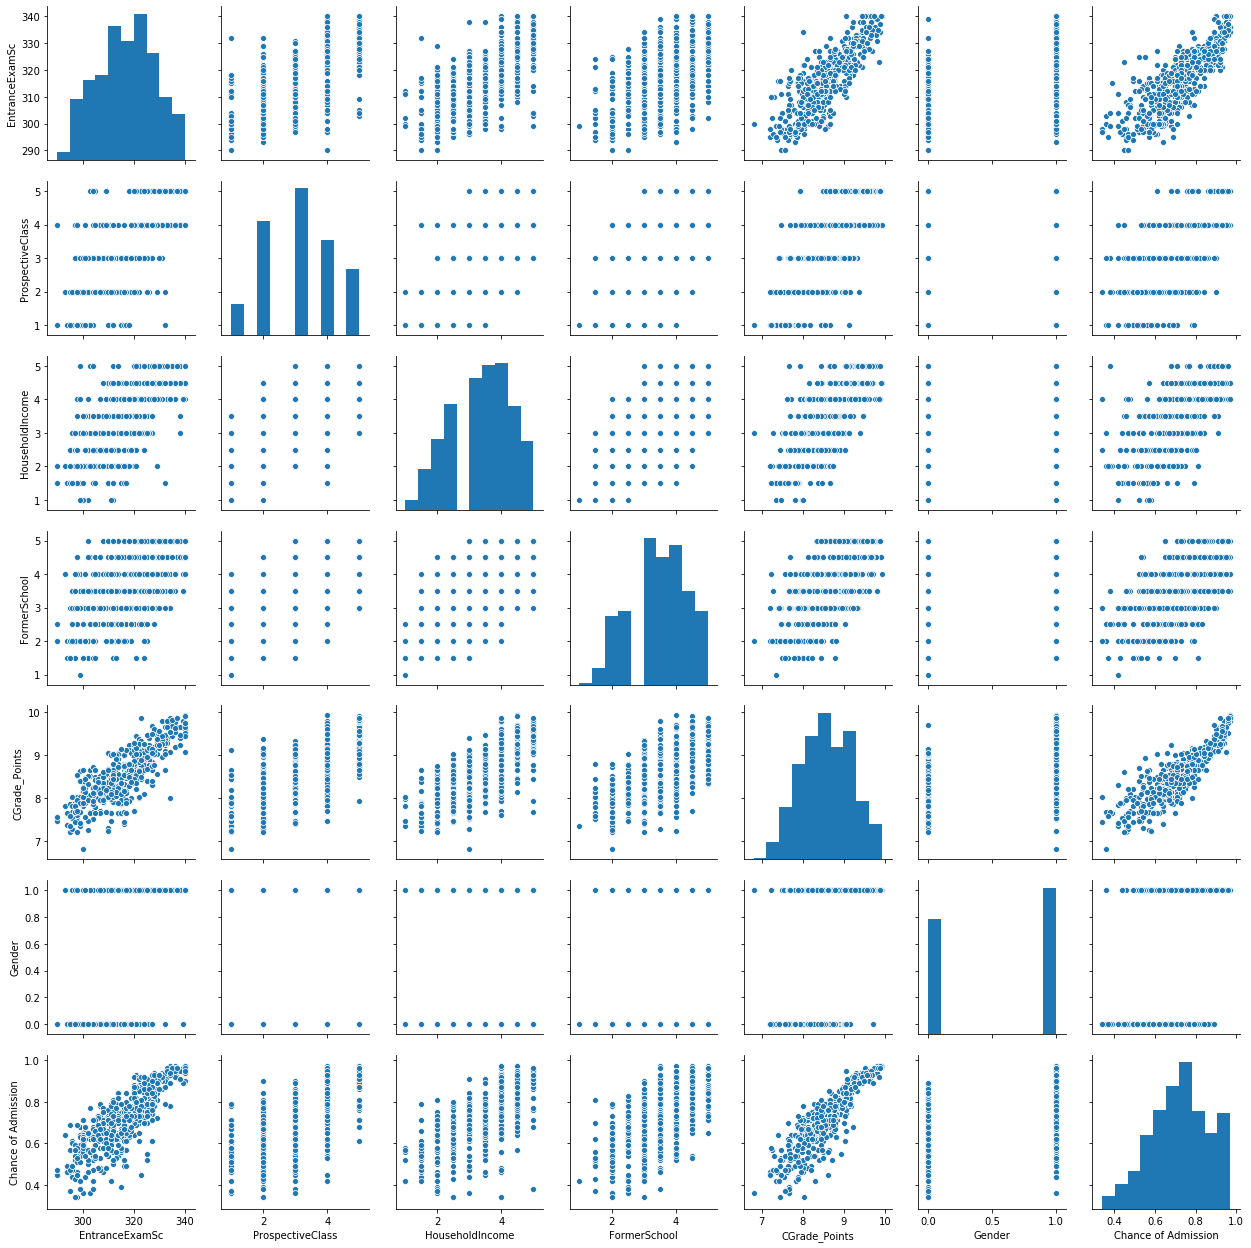

In [12]:
sns.pairplot(data)

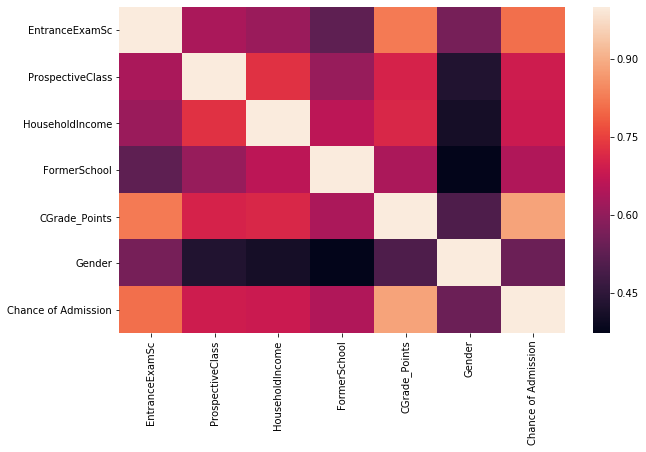

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

In [14]:
data.columns

Index(['EntranceExamSc', 'ProspectiveClass', 'HouseholdIncome', 'FormerSchool',
       'CGrade_Points', 'Gender', 'Chance of Admission'],
      dtype='object')

In [15]:
features = data[['EntranceExamSc', 'ProspectiveClass', 'HouseholdIncome', 'FormerSchool',
       'CGrade_Points', 'Gender']]
#features.head()

In [16]:
label= data[['Chance of Admission']]
#label

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.1)

In [19]:
print(features_train.shape)

(450, 6)


In [20]:
print(features_test.shape)

(50, 6)


In [21]:
print(label_train.shape)

(450, 1)


In [22]:
print(label_test.shape)

(50, 1)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(features_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
label_test.head()

,Chance of Admission
57,0.46
334,0.73
370,0.72
43,0.87
497,0.93


In [27]:
label_test.iloc[0]

Chance of Admission    0.46
Name: 57, dtype: float64

In [28]:
model.predict(features_test)[0]

array([0.50789365])

In [29]:
from sklearn.metrics  import mean_squared_error

In [30]:
mean_squared_error(label_test,model.predict(features_test))

0.004358725508589665

In [31]:
error = mean_squared_error(label_test,model.predict(features_test))

In [32]:
np.sqrt(error)

0.06602064456357318

In [33]:
#save model here

In [34]:
dump(model,'admission_prediction_model.joblib')

['admission_prediction_model.joblib']